In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

import xarray as xr
from cmocean import cm
import cartopy.mpl.ticker as cticker


/home/tchonang/miniconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def add_gridlines(ax, label_fontsize=12, x_ticks=None, y_ticks=None, x_labels=None, y_labels=None):
    gl = ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), color='k',linestyle='--',linewidth=0.4)
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = True
    gl.bottom_labels = False
    
    gl.xlabel_style = {'size': label_fontsize}
    gl.ylabel_style = {'size': label_fontsize}
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    # gl.xlocator = plt.MultipleLocator(5)
    # gl.ylocator = plt.MultipleLocator(5)
    ax.set_extent([-128, -123, 32, 39], crs=ccrs.PlateCarree())
    # Set custom x-tick and y-tick locations and labels if provided
    if x_ticks is not None:
        ax.set_xticks(x_ticks, crs=ccrs.PlateCarree())
    if y_ticks is not None:
        ax.set_yticks(y_ticks, crs=ccrs.PlateCarree())
    if x_labels is not None:
        ax.set_xticklabels(x_labels, fontsize=label_fontsize)
    if y_labels is not None:
        ax.set_yticklabels(y_labels, fontsize=label_fontsize)
    # Remove axis labels
#     ax.set_xlabel('')
#     ax.set_ylabel('')
    
    return gl



In [10]:

def find_nearest_swath_index(latitudes, longitudes, lat_p, lon_p):
    distances = np.array([haversine(lat_p, lon_p, latitudes[i], longitudes[i]) for i in range(len(latitudes))])
    index = np.argmin(distances)
    return index


In [3]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

def compute_along_swath_distance(latitudes, longitudes):
    distances = [0]  # start with zero distance for the first point
    for i in range(1, len(latitudes)):
        distance = haversine(latitudes[i-1], longitudes[i-1], latitudes[i], longitudes[i])
        distances.append(distances[-1] + distance)  # cumulative distance
    return distances

In [4]:
directory = '/mnt/flow/swot/Matt_Analysis/CNES_L3_CalVal/version_V1_0/swot_aviso/new/'
#############3 pass 13 
nc_swot_13_filt = xr.open_dataset(directory+'FILT2_60_KM_SUBSET_SWOT_UV_PASS_013_OVER_CALVAL_REGION_V1.0_Stencil_3pts.nc')#.sel(time=slice(time_start, time_end))
# nc_swot_13_filt = nc_swot_13_filt.rename({"num_pixels": "temp"})
# nc_swot_13_filt = nc_swot_13_filt.rename({"num_lines": "num_pixels"})
# nc_swot_13_filt = nc_swot_13_filt.rename({"temp": "num_lines"})

nc_swot_13_filt['ut_g_noiseless'] = np.sqrt(nc_swot_13_filt.u_east_noiseless**2+nc_swot_13_filt.v_north_noiseless**2)
#########3 pass 26
nc_swot_26_filt = xr.open_dataset(directory+'FILT2_60_KM_SUBSET_SWOT_UV_PASS_026_OVER_CALVAL_REGION_V1.0_Stencil_3pts.nc')#.sel(time=slice(time_start, time_end))
# nc_swot_26_filt = nc_swot_26_filt.rename({"num_pixels": "temp"})
# nc_swot_26_filt = nc_swot_26_filt.rename({"num_lines": "num_pixels"})
# nc_swot_26_filt = nc_swot_26_filt.rename({"temp": "num_lines"})

nc_swot_26_filt['ut_g_noiseless'] = np.sqrt(nc_swot_26_filt.u_east_noiseless**2+nc_swot_26_filt.v_north_noiseless**2)

In [5]:
path = '/mnt/flow/swot/Matt_Analysis/calval_orbit_expert_v1.0/calval_v_2/cube/'
nc_avi = xr.open_dataset(path+'CCS_DUACS_U_V_computed_from_adt.nc').sel(time=slice('2023-04-01', '2023-07-10'))

nc_avi_13 = nc_avi.interp(time = nc_swot_13_filt.timec,longitude = nc_swot_13_filt.longitude, latitude = nc_swot_13_filt.latitude)

nc_avi_26 = nc_avi.interp(time = nc_swot_26_filt.timec,longitude = nc_swot_26_filt.longitude, latitude = nc_swot_26_filt.latitude)

In [6]:
nc_avi_13

<xarray.Dataset> Size: 694MB
Dimensions:     (timec: 97, num_lines: 863, num_pixels: 69)
Coordinates:
    time        (timec) datetime64[ns] 776B 2023-03-29T08:40:47.663287936 ......
    longitude   (num_lines, num_pixels) float64 476kB -128.5 -128.5 ... -123.4
    latitude    (num_lines, num_pixels) float64 476kB 25.01 25.0 ... 40.0 39.99
  * timec       (timec) datetime64[ns] 776B 2023-03-29T08:40:47.663287936 ......
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/15)
    adt         (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    err_sla     (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    err_ugosa   (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    err_vgosa   (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    flag_ice    (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    sla         (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    ...          ...
    vgosa       (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    ucgosa      (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    vcgosa      (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    zeta_csiro  (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    sr_csiro    (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
    OW_csiro    (timec, num_lines, num_pixels) float64 46MB nan nan ... nan nan
Attributes:
    Conventions:       CF-1.11
    title:             NRT merged all satellites Global Ocean Gridded SSALTO/...
    institution:       CLS, CNES
    source:            Altimetry measurements
    history:           2023-11-24 00:53:07Z: Creation
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        http://marine.copernicus.eu
    comment:           Sea Surface Height measured by Altimetry and derived v...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SEALEVEL_GLO_PHY_L4_NRT_008_046
    subset:datasetId:  cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.25deg_P...
    subset:date:       2024-04-01T20:59:49.254Z

2023-05-30T10:04:04.736729088
2023-05-30T10:04:04.736729088


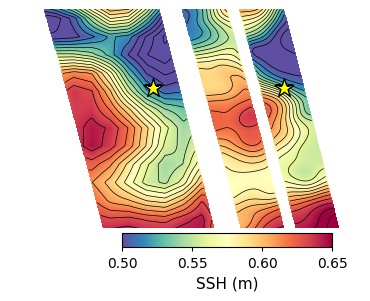

In [7]:

# === Dummy data example (replace with your real data) ===
lon = nc_avi_26.longitude
lat = nc_avi_26.latitude
# lon, lat = np.meshgrid(lon, lat)

ssh_swot = nc_swot_26_filt.ssha_lp_60km[58]
print(nc_swot_26_filt.timec[58].values)
ssh_duacs = nc_avi_26.adt[58]
print(nc_avi_26.time[58].values)


lon_p = -125.044
lat_p = 35.917
label_fontsize1=10

# Custom x-tick and y-tick locations and labels
x_ticks = [-128, -127, -126, -125, -124, -123,-122,-121,-120]
y_ticks = [34, 34.5, 35, 35.5, 36, 36.5,37]
x_labels = ['128°W', '127°W', '126°W', '125°W', '124°W', '123°W', '122°W', '121°W', '120°W']
y_labels = ['34°N', '34.5°N', '35°N', '35.5°N', '36°N', '36.5°N', '37°N']

proj = ccrs.PlateCarree()

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 14),
                         subplot_kw={'projection': proj},
                         gridspec_kw={'wspace': -0.4})  # <-- very small space

# --- AVISO SSHA ---
im1 = axes[0].pcolormesh(lon, lat, ssh_duacs, vmin = 0.5, vmax = .65,cmap='Spectral_r', transform=proj)
cs1 = axes[0].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[0].scatter(lon_p, lat_p, color='yellow', edgecolor='black',
                marker='*', s=200, transform=proj, zorder=5)# axes[0].set_title('AVISO SSHA')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS)
axes[0].set_extent([-127, -124, 34, 37])
axes[0].axis('off')
# add_gridlines(axes[0], x_ticks=x_ticks, y_ticks=y_ticks)
# add_gridlines(axes[0], label_fontsize=label_fontsize1, x_ticks=None, y_ticks=y_ticks, x_labels=None, y_labels=y_labels)


# axes[0].set_xlimit([-126,-123])
# --- SWOT SSHA ---
im2 = axes[1].pcolormesh(lon, lat, ssh_swot, vmin = 0.5, vmax = .65, cmap='Spectral_r', transform=proj)
cs1 = axes[1].contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[1].scatter(lon_p, lat_p, color='yellow', edgecolor='black',
                marker='*', s=200, transform=proj, zorder=5)# axes[1].set_title('SWOT SSHA')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS)
axes[1].set_extent([-127, -124, 34, 37])
axes[1].axis('off')  # Remove frame

plt.subplots_adjust(left=0.05, right=0.3, top=1, bottom=0.2)  # Reduce margins
# --- Shared colorbar ---
# ===== Clean & nice colorbar =====
cbar_ax = fig.add_axes([0.13, 0.508, 0.15, 0.01])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.set_label('SSH (m)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
plt.savefig('figure1.png', dpi=300, transparent=True, bbox_inches='tight')
# plt.suptitle('Comparison of AVISO and SWOT SSHA', fontsize=14)
plt.show()



2023-05-30T10:04:04.736729088
2023-05-30T10:04:04.736729088


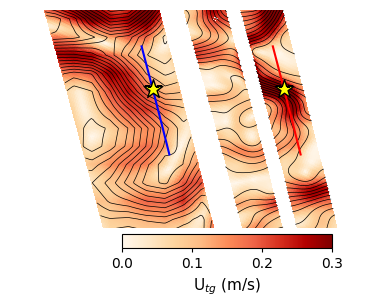

In [30]:

# === Dummy data example (replace with your real data) ===
lon = nc_avi_26.longitude
lat = nc_avi_26.latitude
# lon, lat = np.meshgrid(lon, lat)

ut_swot = np.sqrt(nc_swot_26_filt.u_east_noiseless[58]**2+nc_swot_26_filt.v_north_noiseless[58]**2)
print(nc_swot_26_filt.timec[58].values)
ut_duacs = np.sqrt(nc_avi_26.ugos[58]**2+nc_avi_26.vgos[58]**2)
print(nc_avi_26.time[58].values)
ind = np.where((lat[:,16]>=35) & (lat[:,16]<=36.5))[0]

along_swath_distance = np.asarray(compute_along_swath_distance(lat[ind,48].values, lon[ind,48].values))



lon_p = -125.044
lat_p = 35.917

proj = ccrs.PlateCarree()

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 14),
                         subplot_kw={'projection': proj},
                         gridspec_kw={'wspace': -0.4})  # <-- very small space

# --- AVISO SSHA ---
im1 = axes[0].pcolormesh(lon, lat, ut_duacs, vmin = 0, vmax = .3,cmap='OrRd', transform=proj)
cs1 = axes[0].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[0].plot(lon[ind,16], lat[ind,16],color='b')
axes[0].scatter(lon_p, lat_p, color='yellow', edgecolor='black',
                marker='*', s=200, transform=proj, zorder=5)# axes[0].set_title('AVISO SSHA')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS)
axes[0].set_extent([-127, -124, 34, 37])
axes[0].axis('off')  # Remove frame

# axes[0].set_xlimit([-126,-123])
# --- SWOT SSHA ---
im2 = axes[1].pcolormesh(lon, lat, ut_swot, vmin = 0., vmax = .3, cmap='OrRd', transform=proj)
cs1 = axes[1].contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[1].plot(lon[ind,16], lat[ind,16],color='r')
axes[1].scatter(lon_p, lat_p, color='yellow', edgecolor='black',
                marker='*', s=200, transform=proj, zorder=5)# axes[0].set_title('AVISO SSHA')
# axes[1].set_title('SWOT SSHA')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS)
axes[1].set_extent([-127, -124, 34, 37])
axes[1].axis('off')  # Remove frame

plt.subplots_adjust(left=0.05, right=0.3, top=1, bottom=0.2)  # Reduce margins
# --- Shared colorbar ---
# ===== Clean & nice colorbar =====
cbar_ax = fig.add_axes([0.13, 0.508, 0.15, 0.01])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.set_label('U$_{tg}$ (m/s)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
plt.savefig('figure2.png', dpi=300, transparent=True, bbox_inches='tight')

# plt.suptitle('Comparison of AVISO and SWOT SSHA', fontsize=14)
plt.show()



Mooring at swath distance = 66.10 km


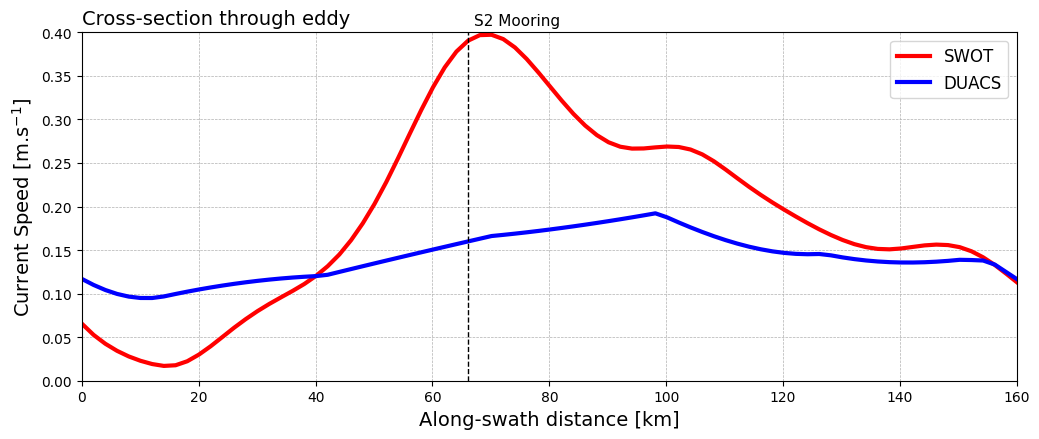

In [40]:
ind_moor = find_nearest_swath_index(lat[ind,16].values, lon[ind,16].values, lat_p, lon_p)
mooring_distance = along_swath_distance[ind_moor]
print(f"Mooring at swath distance = {mooring_distance:.2f} km")
label_fontsize = 14
fig, ax = plt.subplots(1, 1, figsize=(10.5, 4.5))

# Plot currents
ax.plot(along_swath_distance, ut_swot[ind, 17], linewidth=3, color='r', label='SWOT')
ax.plot(along_swath_distance, ut_duacs[ind, 17], linewidth=3, color='b', label='DUACS')
ax.set_xlim([0, 160])
ax.set_ylim([0, .4])


# Plot vertical line at mooring
ax.axvline(mooring_distance, color='k', linestyle='--', linewidth=1)
ax.text(mooring_distance + 0.98, ax.get_ylim()[1]*1.02, 'S2 Mooring', color='k', fontsize=11)

# Title & labels
ax.set_title('Cross-section through eddy', loc='left', fontsize=label_fontsize)
ax.set_xlabel('Along-swath distance [km]', fontsize=label_fontsize)
ax.set_ylabel('Current Speed [m.s$^{-1}$]', fontsize=label_fontsize)

ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)
plt.tight_layout()
plt.savefig('figure7.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()



In [25]:
nc_sst = xr.open_dataset('METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1743420265017.nc')
nc_sst_26 = nc_sst.interp(time = nc_swot_26_filt.timec,longitude = nc_swot_26_filt.longitude, latitude = nc_swot_26_filt.latitude)
nc_sst_13 = nc_sst.interp(time = nc_swot_13_filt.timec,longitude = nc_swot_13_filt.longitude, latitude = nc_swot_13_filt.latitude)

2023-05-30T10:04:04.736729088
2023-05-30T10:04:04.736729088


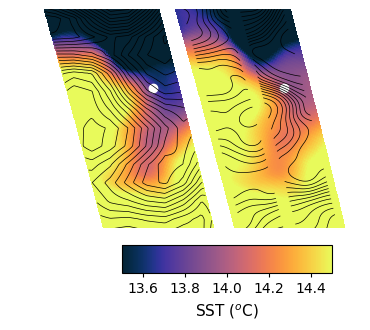

In [26]:

# === Dummy data example (replace with your real data) ===
lon = nc_avi_26.longitude
lat = nc_avi_26.latitude
# lon, lat = np.meshgrid(lon, lat)

sst_swot = nc_sst_26.analysed_sst[58]- 273.15
print(nc_swot_26_filt.timec[58].values)
ut_duacs = np.sqrt(nc_avi_26.ugos[58]**2+nc_avi_26.vgos[58]**2)
print(nc_avi_26.time[58].values)


lon_p = -125.044
lat_p = 35.917

proj = ccrs.PlateCarree()

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 14),
                         subplot_kw={'projection': proj},
                         gridspec_kw={'wspace': -0.4})  # <-- very small space

# --- AVISO SSHA ---
im1 = axes[0].pcolormesh(lon, lat, sst_swot, vmin = 13.5, vmax = 14.5,cmap=cm.thermal, transform=proj)
cs1 = axes[0].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[0].scatter(lon_p, lat_p, color='w', transform=proj)
# axes[0].set_title('AVISO SSHA')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS)
axes[0].set_extent([-127, -124, 34, 37])
axes[0].axis('off')  # Remove frame

# axes[0].set_xlimit([-126,-123])
# --- SWOT SSHA ---
im2 = axes[1].pcolormesh(lon, lat, sst_swot, vmin = 13, vmax = 14.5, cmap=cm.thermal, transform=proj)
cs1 = axes[1].contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
# cs1 = axes[1].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='w', linewidths=0.5, transform=proj)

axes[1].scatter(lon_p, lat_p, color='w', transform=proj)
# axes[1].set_title('SWOT SSHA')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS)
axes[1].set_extent([-127, -124, 34, 37])
axes[1].axis('off')  # Remove frame

plt.subplots_adjust(left=0.05, right=0.3, top=1, bottom=0.2)  # Reduce margins
# # --- Shared colorbar ---
# ===== Clean & nice colorbar =====
cbar_ax = fig.add_axes([0.13, 0.49, 0.15, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.set_label('SST ($^o$C)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
# plt.suptitle('Comparison of AVISO and SWOT SSHA', fontsize=14)
plt.show()



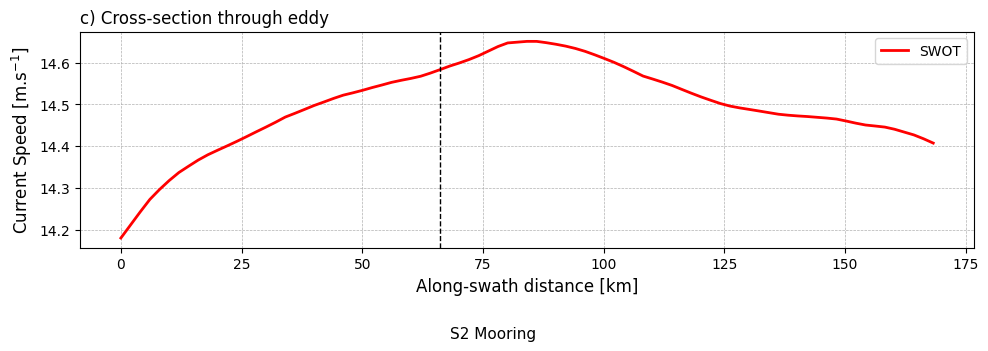

In [27]:
label_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot currents
ax.plot(along_swath_distance, sst_swot[ind, 48], linewidth=2, color='r', label='SWOT')
# ax.plot(along_swath_distance, sst_duacs[ind, 48], linewidth=2, color='b', label='DUACS')
# ax.set_xlim([0, 175])
# ax.set_ylim([0, .5])


# Plot vertical line at mooring
ax.axvline(mooring_distance, color='k', linestyle='--', linewidth=1)
ax.text(mooring_distance + 2, ax.get_ylim()[1]*0.95, 'S2 Mooring', color='k', fontsize=11)

# Title & labels
ax.set_title('c) Cross-section through eddy', loc='left', fontsize=label_fontsize)
ax.set_xlabel('Along-swath distance [km]', fontsize=label_fontsize)
ax.set_ylabel('Current Speed [m.s$^{-1}$]', fontsize=label_fontsize)

ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


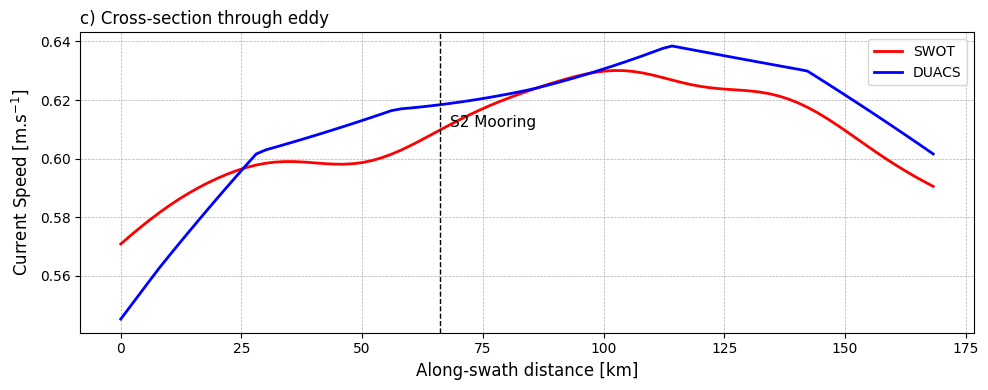

In [28]:
label_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot currents
ax.plot(along_swath_distance, ssh_swot[ind, 48], linewidth=2, color='r', label='SWOT')
ax.plot(along_swath_distance, ssh_duacs[ind, 48], linewidth=2, color='b', label='DUACS')
# ax.set_xlim([0, 175])
# ax.set_ylim([0, .5])


# Plot vertical line at mooring
ax.axvline(mooring_distance, color='k', linestyle='--', linewidth=1)
ax.text(mooring_distance + 2, ax.get_ylim()[1]*0.95, 'S2 Mooring', color='k', fontsize=11)

# Title & labels
ax.set_title('c) Cross-section through eddy', loc='left', fontsize=label_fontsize)
ax.set_xlabel('Along-swath distance [km]', fontsize=label_fontsize)
ax.set_ylabel('Current Speed [m.s$^{-1}$]', fontsize=label_fontsize)

ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


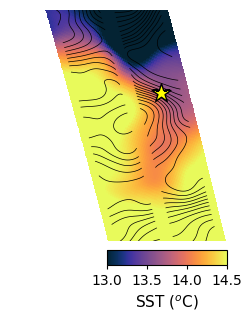

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from cmocean import cm

lon = nc_avi_26.longitude
lat = nc_avi_26.latitude

sst_swot = nc_sst_26.analysed_sst[58] - 273.15
ssh_swot = nc_swot_26_filt.ssha_lp_60km[58]

lon_p = -125.044
lat_p = 35.917
ticks = [13, 13.5, 14, 14.5]

proj = ccrs.PlateCarree()

# === Create figure ===
fig, ax = plt.subplots(1, 1, figsize=(3, 3),
                       subplot_kw={'projection': proj})

# --- SWOT SST ---
im = ax.pcolormesh(lon, lat, sst_swot, vmin=13, vmax=14.5, cmap=cm.thermal, transform=proj)
ax.contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01),
           colors='k', linewidths=0.5, transform=proj)
ax.scatter(lon_p, lat_p, color='yellow', edgecolor='black',
           marker='*', s=200, transform=proj, zorder=5)

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='darkgrey')
ax.set_extent([-127, -124, 34, 37])
ax.axis('off')  # Remove frame

# Add gridlines (optional)
# gl = ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), linestyle='--', color='gray', linewidth=0.3)

# --- Colorbar ---
cbar_ax = fig.add_axes([0.45, 0.03, 0.4, 0.05])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks=ticks)
cbar.set_label('SST ($^o$C)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
plt.savefig('figure3.png', dpi=300, transparent=True, bbox_inches='tight')


plt.show()


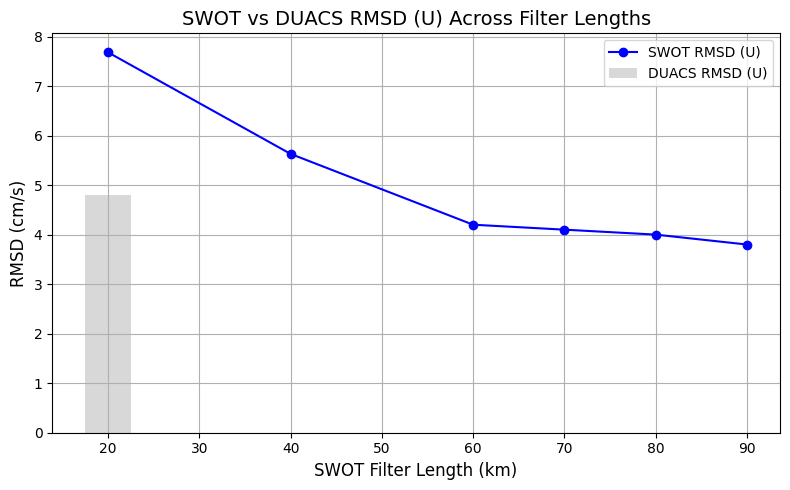

In [61]:
import matplotlib.pyplot as plt

# Define filter lengths (x-axis)
filter_lengths = [20, 40, 60, 70, 80, 90]

# SWOT RMSD values for U component
rmsd_u = [7.68, 5.63, 4.2, 4.1, 4.0, 3.8]

# DUACS RMSD value (same across all filter lengths for reference)
duacs_rmsd_u = [4.8] * len(filter_lengths)

# Create the plot
plt.figure(figsize=(8, 5))

# Line plot for SWOT RMSD (U)
plt.plot(filter_lengths, rmsd_u, marker='o', label='SWOT RMSD (U)', color='blue')

# Bar plot for DUACS RMSD (same height at each filter length)
plt.bar(filter_lengths[0], duacs_rmsd_u[0], width=5, alpha=0.3, label='DUACS RMSD (U)', color='gray')

# Customize the plot
plt.xlabel('SWOT Filter Length (km)', fontsize=12)
plt.ylabel('RMSD (cm/s)', fontsize=12)
plt.title('SWOT vs DUACS RMSD (U) Across Filter Lengths', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


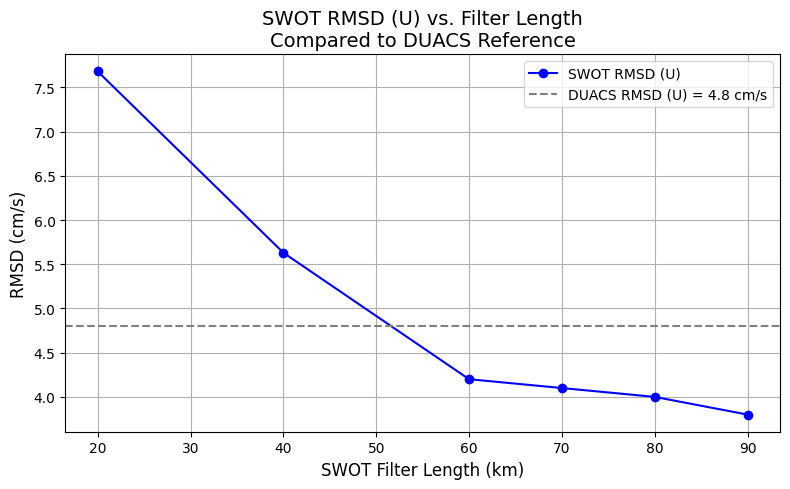

In [42]:
import matplotlib.pyplot as plt

# Define filter lengths (x-axis)
filter_lengths = [20, 40, 60, 70, 80, 90]

# SWOT RMSD values for U, V, and EKE (in cm/s or cm²/s²)
rmsd_u = [7.68, 5.63, 4.2, 4.1, 4.0, 3.8]
rmsd_v = [7.26, 5.86, 4.2, 4.2, 4.3, 4.6]
rmsd_eke = [4.31, 3.32, 2.0, 1.9, 2.0, 2.1]

# DUACS reference RMSD for U
duacs_rmsd_u = 4.8

# Create the plot
plt.figure(figsize=(8, 5))

# Plot SWOT RMSD for U
plt.plot(filter_lengths, rmsd_u, marker='o', color='blue', label='SWOT RMSD (U)')

# Add DUACS RMSD reference as horizontal line
plt.axhline(y=duacs_rmsd_u, color='gray', linestyle='--', label='DUACS RMSD (U) = 4.8 cm/s')

# Customize the plot
plt.xlabel('SWOT Filter Length (km)', fontsize=12)
plt.ylabel('RMSD (cm/s)', fontsize=12)
plt.title('SWOT RMSD (U) vs. Filter Length\nCompared to DUACS Reference', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


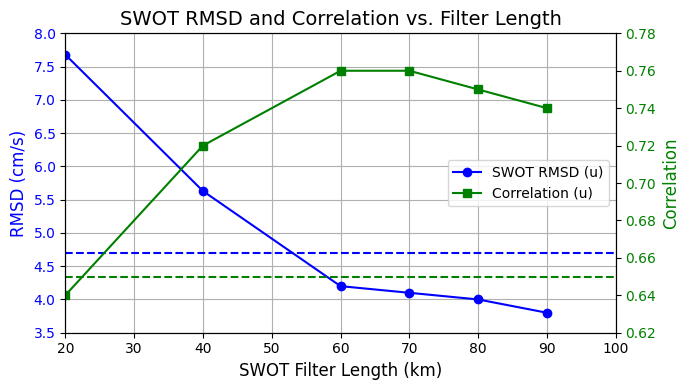

In [85]:
import matplotlib.pyplot as plt

# Filter lengths (x-axis)
filter_lengths = [20, 40, 60, 70, 80, 90]

# SWOT RMSD and correlation values for U
rmsd_u = np.asarray([7.68, 5.63, 4.2, 4.1, 4.0, 3.8])
correlation_u = [0.64, 0.72, 0.76, 0.76, 0.75, 0.74]
rmsd_v =  np.asarray([7.26, 5.86, 4.2, 4.2, 4.3, 4.6])
rmsd_eke = [4.31, 3.32, 2.0, 1.9, 2.0, 2.1]

rmsd_U = np.sqrt(rmsd_u**2 + rmsd_v**2)

# DUACS reference RMSD
duacs_rmsd_u = 4.7

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(7, 4))

# Plot RMSD on primary y-axis
line1 = ax1.plot(filter_lengths, rmsd_u, marker='o', color='blue', label='SWOT RMSD (u)')
plt.axhline(y=duacs_rmsd_u, color='blue', linestyle='--', label='DUACS RMSD (u) = 4.8 cm/s')
# plt.bar(filter_lengths[1], duacs_rmsd_u, width=10, alpha=0.3, color='blue')
# ax1.text(filter_lengths[1], duacs_rmsd_u + 0.05, f'DUACS RMSD',
#              ha='center', va='bottom', fontsize=10, color='black')
# # bar1 = ax1.bar(filter_lengths, [duacs_rmsd_u]*len(filter_lengths), 
#                width=5, alpha=0.3, color='gray', label='DUACS RMSD (U)')

# Customize primary y-axis
ax1.set_xlabel('SWOT Filter Length (km)', fontsize=12)
ax1.set_ylabel('RMSD (cm/s)', color='blue', fontsize=12)
ax1.set_xlim([20,100])
ax1.set_ylim([3.5,8])
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create secondary y-axis for correlation
ax2 = ax1.twinx()
line2 = ax2.plot(filter_lengths, correlation_u, marker='s', color='green', label='Correlation (u)')
plt.axhline(y=0.65, color='green', linestyle='--', label='DUACS RMSD (u) = 4.8 cm/s')
# plt.bar(filter_lengths[-2], 0.65, width=10, alpha=0.3, color='blue')
# ax1.text(filter_lengths[1], 0.65 + 0.05, f'DUACS RMSD',
#              ha='center', va='bottom', fontsize=10, color='black')

ax2.set_ylabel('Correlation', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_xlim([20,100])
ax2.set_ylim([0.62,0.78])

# Title and layout
plt.title('SWOT RMSD and Correlation vs. Filter Length', fontsize=14)
fig.tight_layout()

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines] + ['DUACS RMSD (U)']
ax1.legend(lines , labels, loc='center right')

# Show plot
plt.show()


2023-05-30T22:50:31.790155008
2023-05-30T22:50:31.790155008


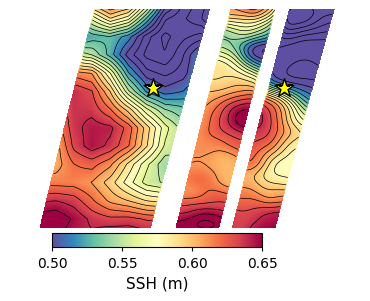

In [274]:

# === Dummy data example (replace with your real data) ===
lon = nc_avi_13.longitude
lat = nc_avi_13.latitude
# lon, lat = np.meshgrid(lon, lat)

ssh_swot = nc_swot_13_filt.ssha_lp_60km[57]
print(nc_swot_13_filt.timec[57].values)
ssh_duacs = nc_avi_13.adt[57]
print(nc_avi_13.time[57].values)


lon_p = -125.044
lat_p = 35.917
label_fontsize1=10

# Custom x-tick and y-tick locations and labels
x_ticks = [-128, -127, -126, -125, -124, -123,-122,-121,-120]
y_ticks = [34, 34.5, 35, 35.5, 36, 36.5,37]
x_labels = ['128°W', '127°W', '126°W', '125°W', '124°W', '123°W', '122°W', '121°W', '120°W']
y_labels = ['34°N', '34.5°N', '35°N', '35.5°N', '36°N', '36.5°N', '37°N']

proj = ccrs.PlateCarree()

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 14),
                         subplot_kw={'projection': proj},
                         gridspec_kw={'wspace': -0.4})  # <-- very small space

# --- AVISO SSHA ---
im1 = axes[0].pcolormesh(lon, lat, ssh_duacs, vmin = 0.5, vmax = .65,cmap='Spectral_r', transform=proj)
cs1 = axes[0].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[0].scatter(lon_p, lat_p, color='yellow', edgecolor='black',
                marker='*', s=200, transform=proj, zorder=5)# axes[0].set_title('AVISO SSHA')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS)
axes[0].set_extent([-127, -124, 34, 37])
axes[0].axis('off')
# add_gridlines(axes[0], x_ticks=x_ticks, y_ticks=y_ticks)
# add_gridlines(axes[0], label_fontsize=label_fontsize1, x_ticks=None, y_ticks=y_ticks, x_labels=None, y_labels=y_labels)


# axes[0].set_xlimit([-126,-123])
# --- SWOT SSHA ---
im2 = axes[1].pcolormesh(lon, lat, ssh_swot, vmin = 0.5, vmax = .65, cmap='Spectral_r', transform=proj)
cs1 = axes[1].contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[1].scatter(lon_p, lat_p, color='yellow', edgecolor='black',
                marker='*', s=200, transform=proj, zorder=5)# axes[1].set_title('SWOT SSHA')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS)
axes[1].set_extent([-127, -124, 34, 37])
axes[1].axis('off')  # Remove frame

plt.subplots_adjust(left=0.05, right=0.3, top=1, bottom=0.2)  # Reduce margins
# --- Shared colorbar ---
# ===== Clean & nice colorbar =====
# cbar_ax = fig.add_axes([0.13, 0.508, 0.15, 0.01])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.08, 0.508, 0.15, 0.01])  # [left, bottom, width, height]

cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.set_label('SSH (m)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
plt.savefig('figure4.png', dpi=300, transparent=True, bbox_inches='tight')
# plt.suptitle('Comparison of AVISO and SWOT SSHA', fontsize=14)
plt.show()



2023-05-30T22:50:31.790155008
2023-05-30T22:50:31.790155008


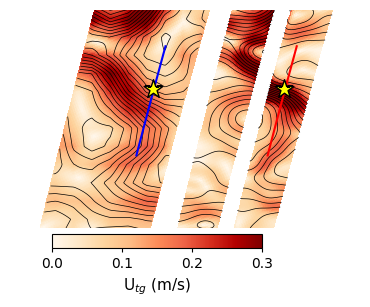

In [290]:

# === Dummy data example (replace with your real data) ===
lon = nc_avi_13.longitude
lat = nc_avi_13.latitude
# lon, lat = np.meshgrid(lon, lat)

ut_swot = np.sqrt(nc_swot_13_filt.u_east_noiseless[57]**2+nc_swot_13_filt.v_north_noiseless[57]**2)
print(nc_swot_13_filt.timec[57].values)
ut_duacs = np.sqrt(nc_avi_13.ugos[57]**2+nc_avi_13.vgos[57]**2)
print(nc_avi_13.time[57].values)


lon_p = -125.044
lat_p = 35.917
ind = np.where((lat[:,48]>=35) & (lat[:,48]<=36.5))[0]

along_swath_distance = np.asarray(compute_along_swath_distance(lat[ind,48].values, lon[ind,48].values))


proj = ccrs.PlateCarree()

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 14),
                         subplot_kw={'projection': proj},
                         gridspec_kw={'wspace': -0.4})  # <-- very small space

# --- AVISO SSHA ---
im1 = axes[0].pcolormesh(lon, lat, ut_duacs, vmin = 0, vmax = .3,cmap='OrRd', transform=proj)
cs1 = axes[0].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[0].plot(lon[ind,48], lat[ind,48],color='b')
axes[0].scatter(lon_p, lat_p, color='yellow', edgecolor='black',
                marker='*', s=200, transform=proj, zorder=5)# axes[1].set_title('SWOT SSHA')
# axes[0].set_title('AVISO SSHA')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS)
axes[0].set_extent([-127, -124, 34, 37])
axes[0].axis('off')  # Remove frame

# axes[0].set_xlimit([-126,-123])
# --- SWOT SSHA ---
im2 = axes[1].pcolormesh(lon, lat, ut_swot, vmin = 0., vmax = .3, cmap='OrRd', transform=proj)
cs1 = axes[1].contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[1].plot(lon[ind,48], lat[ind,48],color='r')
axes[1].scatter(lon_p, lat_p, color='yellow', edgecolor='black',
                marker='*', s=200, transform=proj, zorder=5)# axes[1].set_title('SWOT SSHA')
# axes[1].set_title('SWOT SSHA')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS)
axes[1].set_extent([-127, -124, 34, 37])
axes[1].axis('off')  # Remove frame

plt.subplots_adjust(left=0.05, right=0.3, top=1, bottom=0.2)  # Reduce margins
# --- Shared colorbar ---
# ===== Clean & nice colorbar =====
cbar_ax = fig.add_axes([0.08, 0.508, 0.15, 0.01])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.set_label('U$_{tg}$ (m/s)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
plt.savefig('figure5.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()



In [303]:

def find_nearest_swath_index(latitudes, longitudes, lat_p, lon_p):
    distances = np.array([haversine(lat_p, lon_p, latitudes[i], longitudes[i]) for i in range(len(latitudes))])
    index = np.argmin(distances)
    return index


In [305]:
ind_moor = find_nearest_swath_index(lat[ind,48].values, lon[ind,48].values, lat_p, lon_p)
mooring_distance = along_swath_distance[ind_moor]
print(f"Mooring at swath distance = {mooring_distance:.2f} km")


Mooring at swath distance = 104.17 km


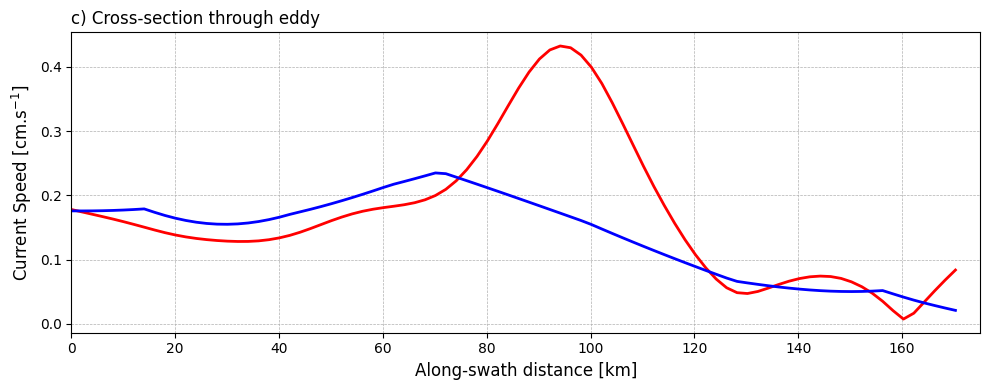

In [302]:
# import matplotlib.pyplot as plt
label_fontsize=12
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.plot(along_swath_distance, ut_swot[ind, 48], linewidth = 2,color='r',label='SWOT')
ax.plot(along_swath_distance, ut_duacs[ind, 48], linewidth = 2,color='b', label='DUACS')
ax.set_xlim([0,175])

# Adding title and labels
ax.set_title('c) Cross-section through eddy',loc='left', fontsize=label_fontsize)
ax.set_xlabel('Along-swath distance [km]', fontsize=label_fontsize)
ax.set_ylabel('Current Speed [cm.s$^{-1}$]', fontsize=label_fontsize)


ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


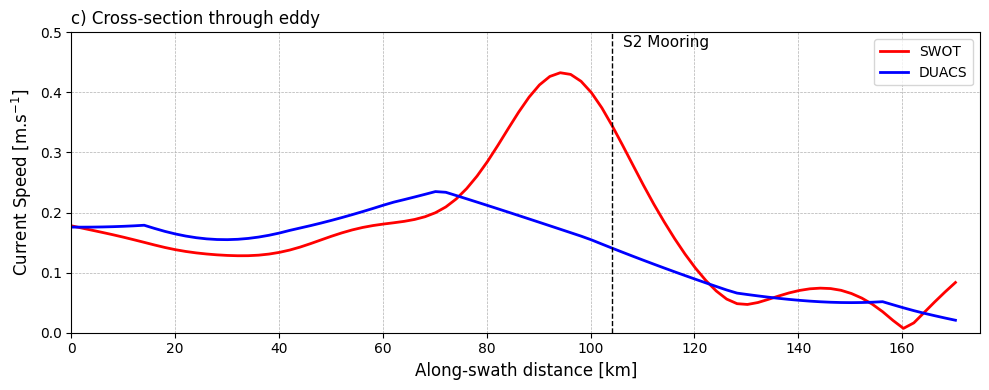

In [307]:
label_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot currents
ax.plot(along_swath_distance, ut_swot[ind, 48], linewidth=2, color='r', label='SWOT')
ax.plot(along_swath_distance, ut_duacs[ind, 48], linewidth=2, color='b', label='DUACS')
ax.set_xlim([0, 175])
ax.set_ylim([0, .5])


# Plot vertical line at mooring
ax.axvline(mooring_distance, color='k', linestyle='--', linewidth=1)
ax.text(mooring_distance + 2, ax.get_ylim()[1]*0.95, 'S2 Mooring', color='k', fontsize=11)

# Title & labels
ax.set_title('c) Cross-section through eddy', loc='left', fontsize=label_fontsize)
ax.set_xlabel('Along-swath distance [km]', fontsize=label_fontsize)
ax.set_ylabel('Current Speed [m.s$^{-1}$]', fontsize=label_fontsize)

ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


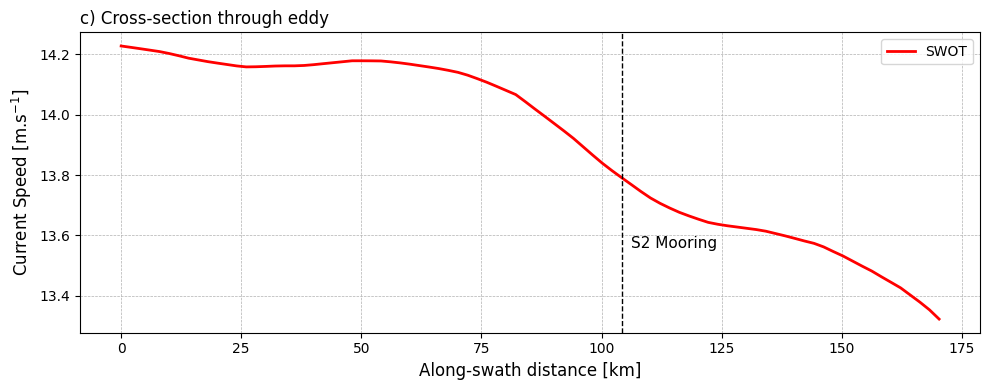

In [310]:
label_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot currents
ax.plot(along_swath_distance, sst_swot[ind, 48], linewidth=2, color='r', label='SWOT')
# ax.plot(along_swath_distance, sst_duacs[ind, 48], linewidth=2, color='b', label='DUACS')
# ax.set_xlim([0, 175])
# ax.set_ylim([0, .5])


# Plot vertical line at mooring
ax.axvline(mooring_distance, color='k', linestyle='--', linewidth=1)
ax.text(mooring_distance + 2, ax.get_ylim()[1]*0.95, 'S2 Mooring', color='k', fontsize=11)

# Title & labels
ax.set_title('c) Cross-section through eddy', loc='left', fontsize=label_fontsize)
ax.set_xlabel('Along-swath distance [km]', fontsize=label_fontsize)
ax.set_ylabel('Current Speed [m.s$^{-1}$]', fontsize=label_fontsize)

ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


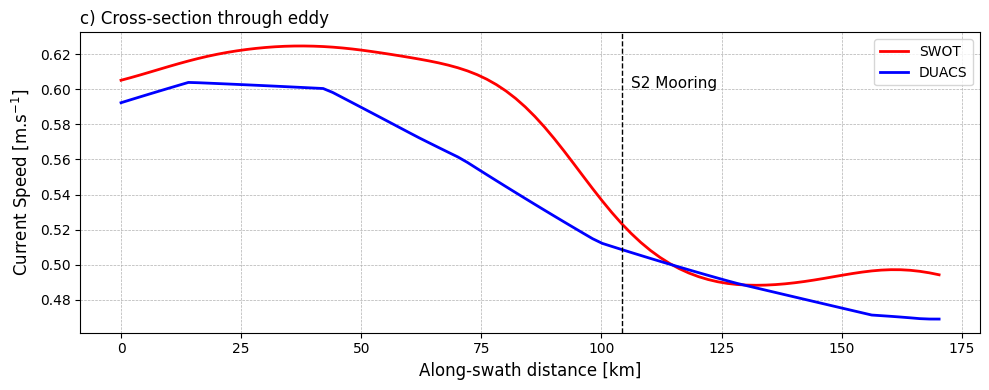

In [312]:
label_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot currents
ax.plot(along_swath_distance, ssh_swot[ind, 48], linewidth=2, color='r', label='SWOT')
ax.plot(along_swath_distance, ssh_duacs[ind, 48], linewidth=2, color='b', label='DUACS')
# ax.set_xlim([0, 175])
# ax.set_ylim([0, .5])


# Plot vertical line at mooring
ax.axvline(mooring_distance, color='k', linestyle='--', linewidth=1)
ax.text(mooring_distance + 2, ax.get_ylim()[1]*0.95, 'S2 Mooring', color='k', fontsize=11)

# Title & labels
ax.set_title('c) Cross-section through eddy', loc='left', fontsize=label_fontsize)
ax.set_xlabel('Along-swath distance [km]', fontsize=label_fontsize)
ax.set_ylabel('Current Speed [m.s$^{-1}$]', fontsize=label_fontsize)

ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


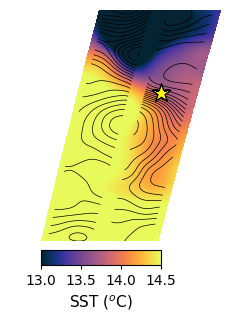

In [280]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from cmocean import cm

lon = nc_avi_13.longitude
lat = nc_avi_13.latitude

sst_swot = nc_sst_13.analysed_sst[57] - 273.15
ssh_swot = nc_swot_13_filt.ssha_lp_60km[57]

lon_p = -125.044
lat_p = 35.917
ticks = [13, 13.5, 14, 14.5]

proj = ccrs.PlateCarree()

# === Create figure ===
fig, ax = plt.subplots(1, 1, figsize=(3, 3),
                       subplot_kw={'projection': proj})

# --- SWOT SST ---
im = ax.pcolormesh(lon, lat, sst_swot, vmin=13, vmax=14.5, cmap=cm.thermal, transform=proj)
ax.contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01),
           colors='k', linewidths=0.5, transform=proj)
ax.scatter(lon_p, lat_p, color='yellow', edgecolor='black',
           marker='*', s=200, transform=proj, zorder=5)

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='darkgrey')
ax.set_extent([-127, -124, 34, 37])
ax.axis('off')  # Remove frame

# Add gridlines (optional)
# gl = ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), linestyle='--', color='gray', linewidth=0.3)

# --- Colorbar ---
cbar_ax = fig.add_axes([0.23, 0.03, 0.4, 0.05])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks=ticks)
cbar.set_label('SST ($^o$C)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
plt.savefig('figure6.png', dpi=300, transparent=True, bbox_inches='tight')


plt.show()


2023-05-30T22:50:31.790155008
2023-05-30T22:50:31.790155008


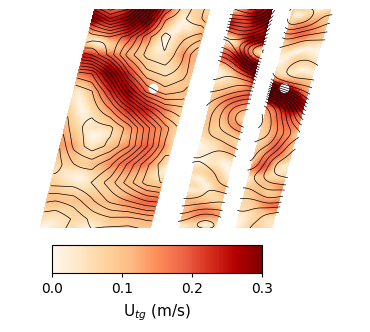

In [202]:

# === Dummy data example (replace with your real data) ===
lon = nc_avi_13.longitude
lat = nc_avi_13.latitude
# lon, lat = np.meshgrid(lon, lat)

uct_swot = np.sqrt(nc_swot_13_filt.uc_east_noiseless[57]**2+nc_swot_13_filt.vc_north_noiseless[57]**2)
print(nc_swot_13_filt.timec[57].values)
ut_duacs = np.sqrt(nc_avi_13.ugos[57]**2+nc_avi_13.vgos[57]**2)
print(nc_avi_13.time[57].values)


lon_p = -125.044
lat_p = 35.917

proj = ccrs.PlateCarree()

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 14),
                         subplot_kw={'projection': proj},
                         gridspec_kw={'wspace': -0.4})  # <-- very small space

# --- AVISO SSHA ---
im1 = axes[0].pcolormesh(lon, lat, ut_duacs, vmin = 0, vmax = .3,cmap='OrRd', transform=proj)
cs1 = axes[0].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[0].scatter(lon_p, lat_p, color='w', transform=proj)
# axes[0].set_title('AVISO SSHA')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS)
axes[0].set_extent([-127, -124, 34, 37])
axes[0].axis('off')  # Remove frame

# axes[0].set_xlimit([-126,-123])
# --- SWOT SSHA ---
im2 = axes[1].pcolormesh(lon, lat, uct_swot, vmin = 0., vmax = .3, cmap='OrRd', transform=proj)
cs1 = axes[1].contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[1].scatter(lon_p, lat_p, color='w', transform=proj)
# axes[1].set_title('SWOT SSHA')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS)
axes[1].set_extent([-127, -124, 34, 37])
axes[1].axis('off')  # Remove frame

plt.subplots_adjust(left=0.05, right=0.3, top=1, bottom=0.2)  # Reduce margins
# --- Shared colorbar ---
# ===== Clean & nice colorbar =====
cbar_ax = fig.add_axes([0.08, 0.49, 0.15, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.set_label('U$_{tg}$ (m/s)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
# plt.suptitle('Comparison of AVISO and SWOT SSHA', fontsize=14)
plt.show()



2023-05-30T22:50:31.790155008
2023-05-30T22:50:31.790155008


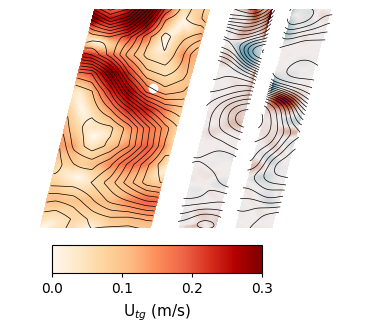

In [209]:

# === Dummy data example (replace with your real data) ===
lon = nc_avi_13.longitude
lat = nc_avi_13.latitude
# lon, lat = np.meshgrid(lon, lat)

uct_swot = np.sqrt(nc_swot_13_filt.uc_east_noiseless[57]**2+nc_swot_13_filt.vc_north_noiseless[57]**2)
print(nc_swot_13_filt.timec[57].values)
ut_duacs = np.sqrt(nc_avi_13.ugos[57]**2+nc_avi_13.vgos[57]**2)
print(nc_avi_13.time[57].values)


lon_p = -125.044
lat_p = 35.917

proj = ccrs.PlateCarree()

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 14),
                         subplot_kw={'projection': proj},
                         gridspec_kw={'wspace': -0.4})  # <-- very small space

# --- AVISO SSHA ---
im1 = axes[0].pcolormesh(lon, lat, ut_duacs, vmin = 0, vmax = .3,cmap='OrRd', transform=proj)
cs1 = axes[0].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[0].scatter(lon_p, lat_p, color='w', transform=proj)
# axes[0].set_title('AVISO SSHA')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS)
axes[0].set_extent([-127, -124, 34, 37])
axes[0].axis('off')  # Remove frame

# axes[0].set_xlimit([-126,-123])
# --- SWOT SSHA ---
im2 = axes[1].pcolormesh(lon, lat, uct_swot-ut_swot, vmin = -0.1, vmax = .1, cmap=cm.balance, transform=proj)
cs1 = axes[1].contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
# axes[1].scatter(lon_p, lat_p, color='w', transform=proj)
# axes[1].set_title('SWOT SSHA')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS)
axes[1].set_extent([-127, -124, 34, 37])
axes[1].axis('off')  # Remove frame

plt.subplots_adjust(left=0.05, right=0.3, top=1, bottom=0.2)  # Reduce margins
# --- Shared colorbar ---
# ===== Clean & nice colorbar =====
cbar_ax = fig.add_axes([0.08, 0.49, 0.15, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cbar.set_label('U$_{tg}$ (m/s)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
# plt.suptitle('Comparison of AVISO and SWOT SSHA', fontsize=14)
plt.show()



In [200]:
np.nanmax(uct_swot-ut_swot)

0.0

2023-05-30T22:50:31.790155008
2023-05-30T22:50:31.790155008


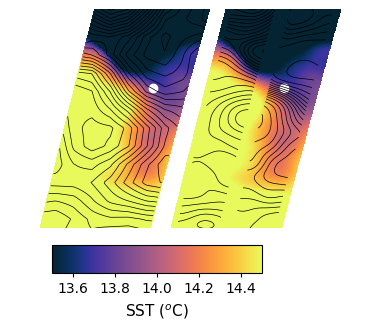

In [190]:

# === Dummy data example (replace with your real data) ===
lon = nc_avi_13.longitude
lat = nc_avi_13.latitude
# lon, lat = np.meshgrid(lon, lat)

sst_swot = nc_sst_13.analysed_sst[57]- 273.15
print(nc_swot_13_filt.timec[57].values)
ut_duacs = np.sqrt(nc_avi_13.ugos[57]**2+nc_avi_13.vgos[57]**2)
print(nc_avi_13.time[57].values)


lon_p = -125.044
lat_p = 35.917

proj = ccrs.PlateCarree()

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 14),
                         subplot_kw={'projection': proj},
                         gridspec_kw={'wspace': -0.4})  # <-- very small space

# --- AVISO SSHA ---
im1 = axes[0].pcolormesh(lon, lat, sst_swot, vmin = 13.5, vmax = 14.5,cmap=cm.thermal, transform=proj)
cs1 = axes[0].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
axes[0].scatter(lon_p, lat_p, color='w', transform=proj)
# axes[0].set_title('AVISO SSHA')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS)
axes[0].set_extent([-127, -124, 34, 37])
axes[0].axis('off')  # Remove frame

# axes[0].set_xlimit([-126,-123])
# --- SWOT SSHA ---
im2 = axes[1].pcolormesh(lon, lat, sst_swot, vmin = 13.5, vmax = 14.5, cmap=cm.thermal, transform=proj)
cs1 = axes[1].contour(lon, lat, ssh_swot, levels=np.arange(0.4, 0.71, 0.01), colors='k', linewidths=0.5, transform=proj)
# cs1 = axes[1].contour(lon, lat, ssh_duacs, levels=np.arange(0.4, 0.71, 0.01), colors='w', linewidths=0.5, transform=proj)

axes[1].scatter(lon_p, lat_p, color='w', transform=proj)
# axes[1].set_title('SWOT SSHA')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS)
axes[1].set_extent([-127, -124, 34, 37])
axes[1].axis('off')  # Remove frame

plt.subplots_adjust(left=0.05, right=0.3, top=1, bottom=0.2)  # Reduce margins
# --- Shared colorbar ---
# ===== Clean & nice colorbar =====
cbar_ax = fig.add_axes([0.08, 0.49, 0.15, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im2, cax=cbar_ax, orientation='horizontal')
cbar.set_label('SST ($^o$C)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.8)
# plt.suptitle('Comparison of AVISO and SWOT SSHA', fontsize=14)
plt.show()



In [62]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# === Real data ===
lon = nc_avi_26.longitude
lat = nc_avi_26.latitude

ssh_swot = nc_swot_26_filt.ssha_lp_60km[60]
ssh_duacs = nc_avi_26.adt[60]

proj = ccrs.PlateCarree()

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 7),
                         subplot_kw={'projection': proj},
                         gridspec_kw={'wspace': 0.02})  # Very small space

# --- AVISO SSHA ---
im1 = axes[0].pcolormesh(lon, lat, ssh_duacs, vmin=0.4, vmax=0.7, cmap='RdBu_r', transform=proj)
axes[0].set_title('AVISO SSHA')
axes[0].coastlines()
axes[0].set_extent([-127, -124, 34, 37], crs=ccrs.PlateCarree())
axes[0].axis('off')  # Remove frame

# --- SWOT SSHA ---
im2 = axes[1].pcolormesh(lon, lat, ssh_swot, vmin=0.4, vmax=0.7, cmap='RdBu_r', transform=proj)
axes[1].set_title('SWOT SSHA')
axes[1].coastlines()
axes[1].set_extent([-127, -124, 34, 37], crs=ccrs.PlateCarree())
axes[1].axis('off')  # Remove frame

# --- Shared colorbar ---
cbar = fig.colorbar(im1, ax=axes, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('SSHA (m)')

plt.subplots_adjust(left=0.05, right=0.2, top=0.95, bottom=0.1)  # Tight layout
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3883521402.py, line 37)

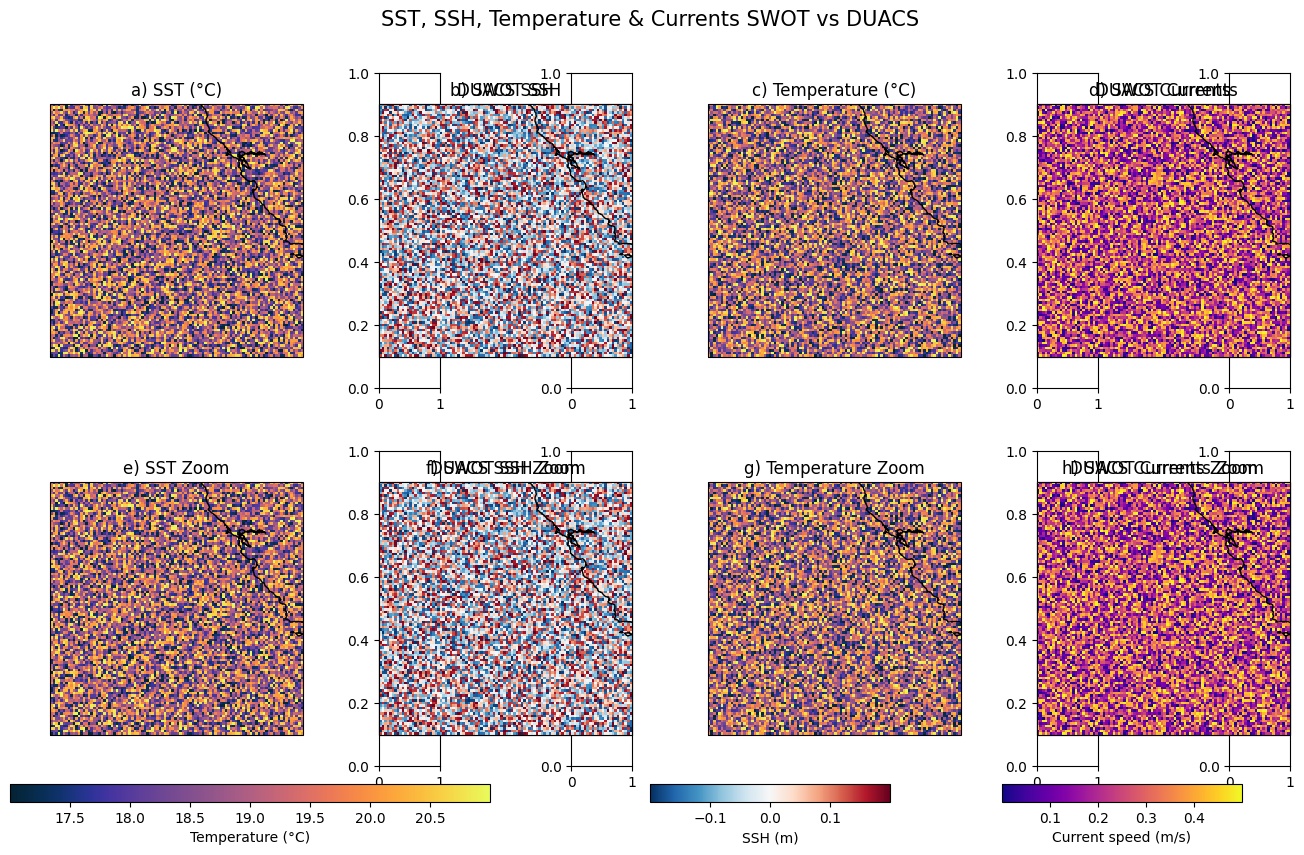

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

# ===== Dummy Data ===== (replace with your real data)
lon = np.linspace(-130, -120, 100)
lat = np.linspace(30, 40, 100)
lon, lat = np.meshgrid(lon, lat)

sst = np.random.uniform(17, 21, size=(100, 100))
ssh_swot = np.random.uniform(-0.2, 0.2, size=(100, 100))
ssh_duacs = np.random.uniform(-0.2, 0.2, size=(100, 100))
temp = np.random.uniform(15, 19, size=(100, 100))
curr_swot = np.random.uniform(0, 0.5, size=(100, 100))
curr_duacs = np.random.uniform(0, 0.5, size=(100, 100))

proj = ccrs.PlateCarree()

# ===== Create Figure and Grid =====
fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(2, 4, wspace=0.3, hspace=0.2)

# ===== Column 1: SST =====
ax1 = fig.add_subplot(gs[0, 0], projection=proj)
im1 = ax1.pcolormesh(lon, lat, sst, cmap=cmocean.cm.thermal, transform=proj)
ax1.set_title('a) SST (°C)')
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)

ax5 = fig.add_subplot(gs[1, 0], projection=proj)
im5 = ax5.pcolormesh(lon, lat, sst, cmap=cmocean.cm.thermal, transform=proj)
ax5.set_title('e) SST Zoom')
ax5.coastlines()
ax5.add_feature(cfeature.BORDERS)

# ===== Column 2: SSH SWOT + DUACS side-by-side =====
for row, (ssh_s, ssh_d, title) in enumerate([(ssh_swot, ssh_duacs, 'SSH'), (ssh_swot, ssh_duacs, 'SSH Zoom')]):
    ax = fig.add_subplot(gs[row, 1])  # dummy axis
    divider = make_axes_locatable(ax)
    ax_swot_pos = divider.append_axes("left", size="50%", pad=0.05, sharey=ax)
    ax_duacs_pos = divider.append_axes("right", size="50%", pad=0.05, sharey=ax)

    ax_swot = fig.add_axes(ax_swot_pos.get_position(), projection=proj)
    ax_duacs = fig.add_axes(ax_duacs_pos.get_position(), projection=proj)

    im2 = ax_swot.pcolormesh(lon, lat, ssh_s, cmap='RdBu_r', transform=proj)
    im3 = ax_duacs.pcolormesh(lon, lat, ssh_d, cmap='RdBu_r', transform=proj)
    ax_swot.set_title(f"{'b)' if row == 0 else 'f)'} SWOT {title}")
    ax_duacs.set_title(f"DUACS {title}")
    ax_swot.coastlines()
    ax_duacs.coastlines()

    fig.delaxes(ax)

# ===== Column 3: Temperature =====
ax3 = fig.add_subplot(gs[0, 2], projection=proj)
im8 = ax3.pcolormesh(lon, lat, temp, cmap=cmocean.cm.thermal, transform=proj)
ax3.set_title('c) Temperature (°C)')
ax3.coastlines()

ax7 = fig.add_subplot(gs[1, 2], projection=proj)
im9 = ax7.pcolormesh(lon, lat, temp, cmap=cmocean.cm.thermal, transform=proj)
ax7.set_title('g) Temperature Zoom')
ax7.coastlines()

# ===== Column 4: Currents SWOT + DUACS side-by-side =====
for row, (cur_s, cur_d, title) in enumerate([(curr_swot, curr_duacs, 'Currents'), (curr_swot, curr_duacs, 'Currents Zoom')]):
    ax = fig.add_subplot(gs[row, 3])  # dummy axis
    divider = make_axes_locatable(ax)
    ax_swot_pos = divider.append_axes("left", size="50%", pad=0.05, sharey=ax)
    ax_duacs_pos = divider.append_axes("right", size="50%", pad=0.05, sharey=ax)

    ax_swot = fig.add_axes(ax_swot_pos.get_position(), projection=proj)
    ax_duacs = fig.add_axes(ax_duacs_pos.get_position(), projection=proj)

    im10 = ax_swot.pcolormesh(lon, lat, cur_s, cmap='plasma', transform=proj)
    im11 = ax_duacs.pcolormesh(lon, lat, cur_d, cmap='plasma', transform=proj)
    ax_swot.set_title(f"{'d)' if row == 0 else 'h)'} SWOT {title}")
    ax_duacs.set_title(f"DUACS {title}")
    ax_swot.coastlines()
    ax_duacs.coastlines()

    fig.delaxes(ax)

# ===== Colorbars =====
cbar_ax1 = fig.add_axes([0.1, 0.07, 0.3, 0.02])  # SST + Temp
fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal', label='Temperature (°C)')

cbar_ax2 = fig.add_axes([0.5, 0.07, 0.15, 0.02])  # SSH
fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal', label='SSH (m)')

cbar_ax3 = fig.add_axes([0.72, 0.07, 0.15, 0.02])  # Currents
fig.colorbar(im10, cax=cbar_ax3, orientation='horizontal', label='Current speed (m/s)')

plt.suptitle('SST, SSH, Temperature & Currents SWOT vs DUACS', fontsize=15, y=0.95)
plt.show()


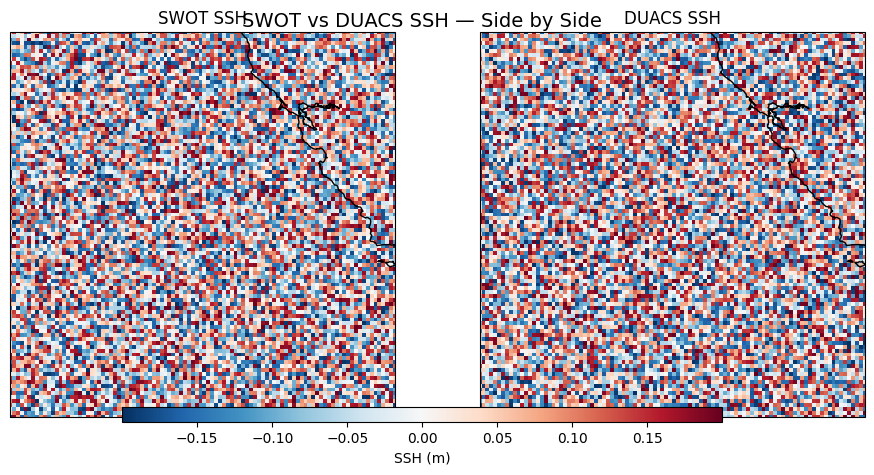

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

# === Dummy Data === (replace with your SSH or Currents)
lon = np.linspace(-130, -120, 100)
lat = np.linspace(30, 40, 100)
lon, lat = np.meshgrid(lon, lat)

ssh_swot = np.random.uniform(-0.2, 0.2, size=(100, 100))
ssh_duacs = np.random.uniform(-0.2, 0.2, size=(100, 100))

proj = ccrs.PlateCarree()

# === Create Figure and GridSpec ===
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.02)  # small space

# --- SWOT Panel ---
ax1 = fig.add_subplot(gs[0], projection=proj)
im1 = ax1.pcolormesh(lon, lat, ssh_swot, cmap='RdBu_r', transform=proj)
ax1.set_title('SWOT SSH')
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([-130, -120, 30, 40])  # Same extent

# --- DUACS Panel ---
ax2 = fig.add_subplot(gs[1], projection=proj)
im2 = ax2.pcolormesh(lon, lat, ssh_duacs, cmap='RdBu_r', transform=proj)
ax2.set_title('DUACS SSH')
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([-130, -120, 30, 40])  # Same extent

# --- Optional: Add separation line ---
fig.subplots_adjust(wspace=0.02)  # minimal space
# You can also add a black line between if you want

# --- Colorbar ---
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.03])
fig.colorbar(im1, cax=cbar_ax, orientation='horizontal', label='SSH (m)')

plt.suptitle('SWOT vs DUACS SSH — Side by Side', fontsize=14, y=0.92)
plt.show()


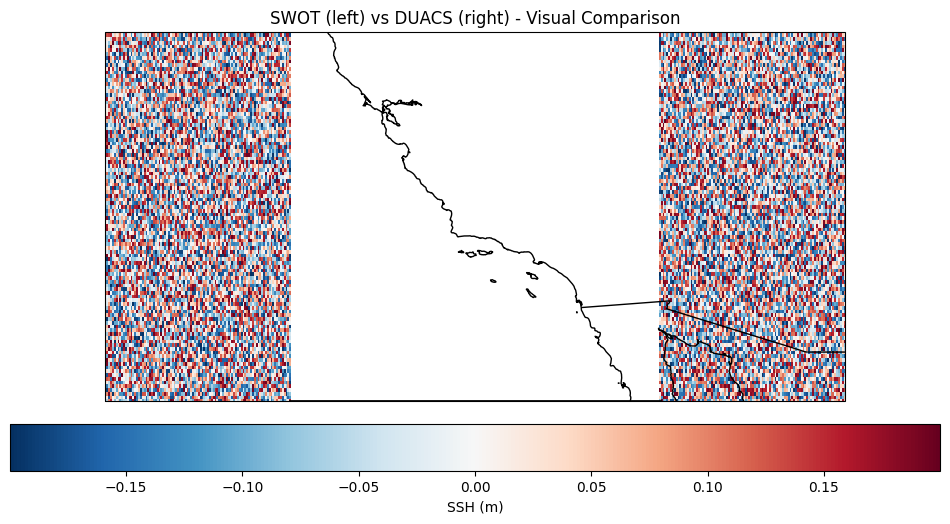

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# === Dummy data (replace with real SWOT and DUACS) ===
lon_swot = np.linspace(-130, -125, 100)
lat_swot = np.linspace(30, 40, 100)
lon_swot, lat_swot = np.meshgrid(lon_swot, lat_swot)
ssh_swot = np.random.uniform(-0.2, 0.2, size=(100, 100))

lon_duacs = np.linspace(-125, -120, 100)
lat_duacs = np.linspace(30, 40, 100)
lon_duacs, lat_duacs = np.meshgrid(lon_duacs, lat_duacs)
ssh_duacs = np.random.uniform(-0.2, 0.2, size=(100, 100))

# === Shift DUACS longitude artificially to put next to SWOT ===
shift = 10  # degrees
lon_duacs_shifted = lon_duacs + shift

# === Plot ===
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection=proj)

# Plot SWOT in real position
im1 = ax.pcolormesh(lon_swot, lat_swot, ssh_swot, cmap='RdBu_r', transform=proj)

# Plot DUACS shifted to the right
im2 = ax.pcolormesh(lon_duacs_shifted, lat_duacs, ssh_duacs, cmap='RdBu_r', transform=proj)

# Coastlines only over SWOT (optional)
ax.set_extent([-130, -110, 30, 40])
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title('SWOT (left) vs DUACS (right) - Visual Comparison')

# Colorbar
cbar = plt.colorbar(im1, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('SSH (m)')

# Optional separation line
ax.plot([lon_swot.max(), lon_duacs_shifted.min()], [30, 30], color='k', linewidth=2, transform=proj)

plt.show()


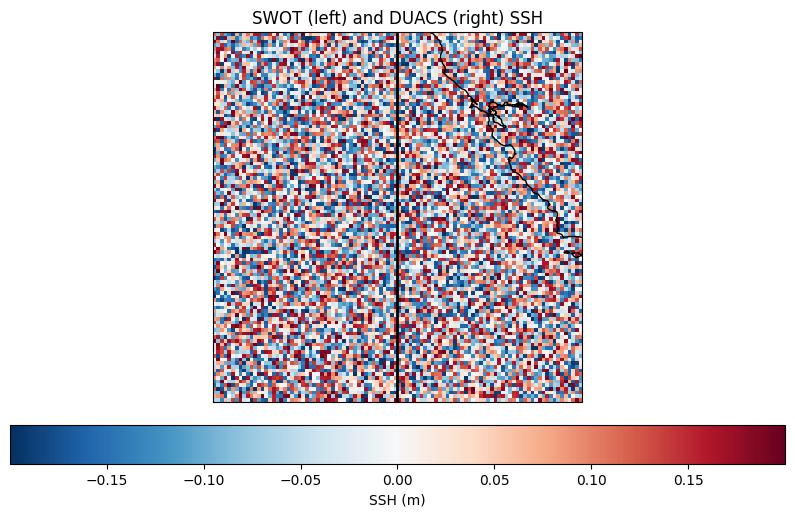

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# === Dummy data === (replace with your real SWOT and DUACS data)
lon = np.linspace(-130, -120, 100)
lat = np.linspace(30, 40, 100)
lon, lat = np.meshgrid(lon, lat)

ssh_swot = np.random.uniform(-0.2, 0.2, size=(100, 100))
ssh_duacs = np.random.uniform(-0.2, 0.2, size=(100, 100))

# === Create split-domain combined field ===
lon_mid = (lon.min() + lon.max()) / 2  # middle longitude
mask_swot = lon < lon_mid
mask_duacs = lon >= lon_mid

ssh_combined = np.full_like(ssh_swot, np.nan)
ssh_combined[mask_swot] = ssh_swot[mask_swot]
ssh_combined[mask_duacs] = ssh_duacs[mask_duacs]

# === Plot ===
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection=proj)

im = ax.pcolormesh(lon, lat, ssh_combined, cmap='RdBu_r', transform=proj)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title('SWOT (left) and DUACS (right) SSH')

# Separation line
ax.plot([lon_mid, lon_mid], [lat.min(), lat.max()], color='k', linewidth=2, transform=proj)

# Colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('SSH (m)')

plt.show()


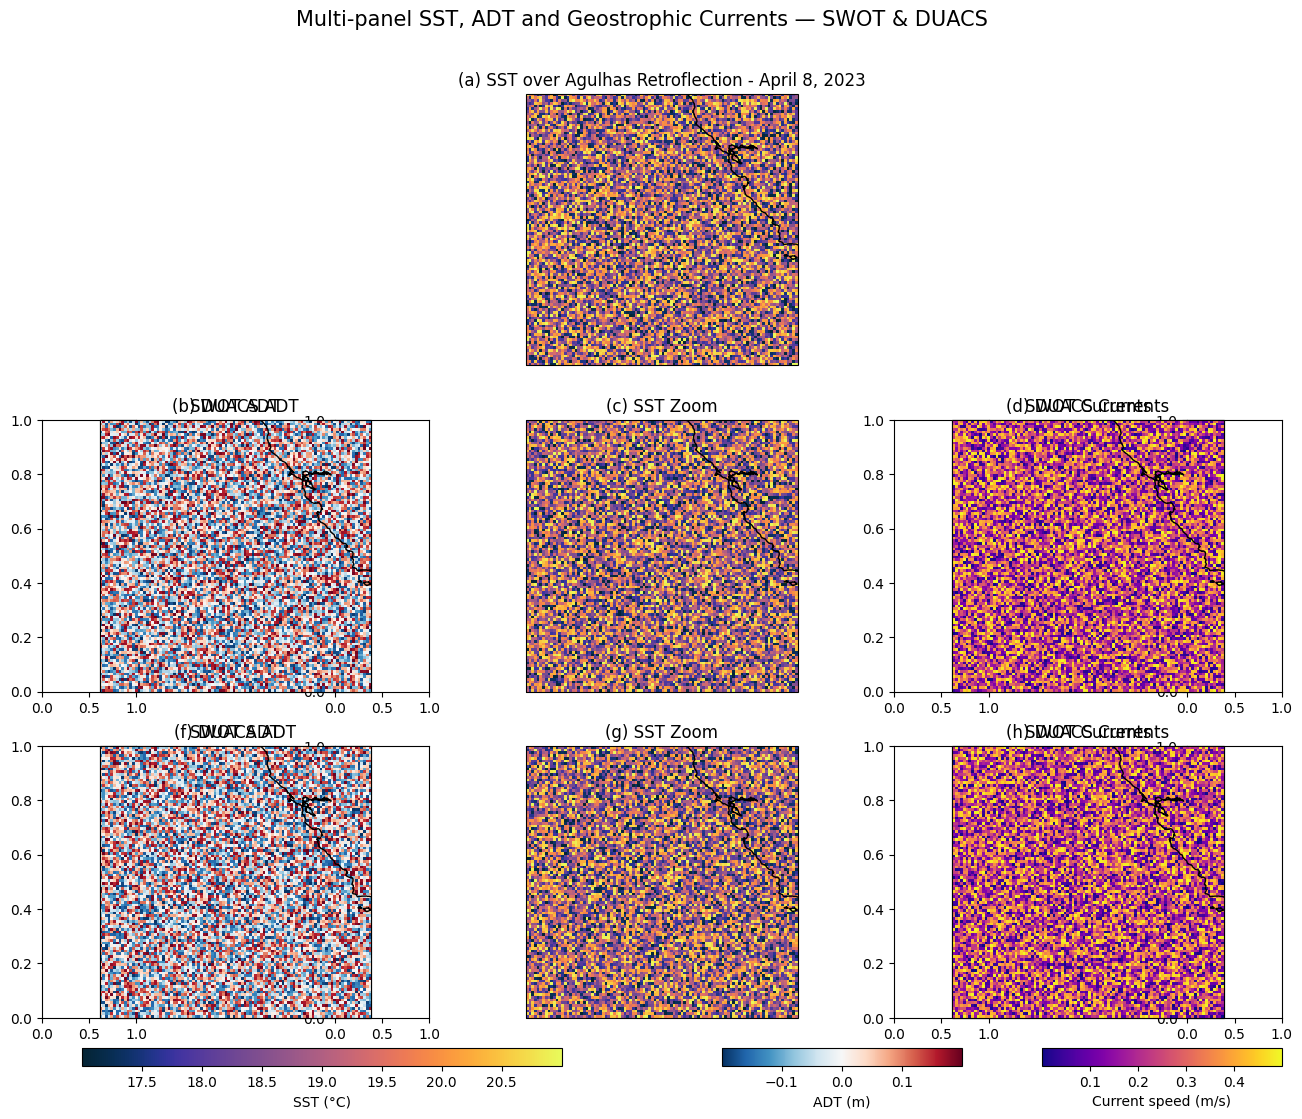

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

# === Dummy data (replace with your real data) ===
lon = np.linspace(-130, -120, 100)
lat = np.linspace(30, 40, 100)
lon, lat = np.meshgrid(lon, lat)

# SST
sst = np.random.uniform(17, 21, size=(100, 100))
sst_zoom_1 = np.random.uniform(17, 21, size=(100, 100))
sst_zoom_2 = np.random.uniform(17, 21, size=(100, 100))

# ADT DUACS & SWOT
adt_duacs_1 = np.random.uniform(-0.2, 0.2, size=(100, 100))
adt_swot_1 = np.random.uniform(-0.2, 0.2, size=(100, 100))
adt_duacs_2 = np.random.uniform(-0.2, 0.2, size=(100, 100))
adt_swot_2 = np.random.uniform(-0.2, 0.2, size=(100, 100))

# Currents DUACS & SWOT
curr_duacs_1 = np.random.uniform(0, 0.5, size=(100, 100))
curr_swot_1 = np.random.uniform(0, 0.5, size=(100, 100))
curr_duacs_2 = np.random.uniform(0, 0.5, size=(100, 100))
curr_swot_2 = np.random.uniform(0, 0.5, size=(100, 100))

proj = ccrs.PlateCarree()

# === Create figure and gridspec ===
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1], hspace=0.2, wspace=0.1)

# ===== Panel (a) SST full map =====
ax1 = fig.add_subplot(gs[0, :], projection=proj)
im1 = ax1.pcolormesh(lon, lat, sst, cmap=cmocean.cm.thermal, transform=proj)
ax1.set_title('(a) SST over Agulhas Retroflection - April 8, 2023')
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)

# ===== Row 2 =====
# (b) ADT DUACS left, SWOT right
ax2 = fig.add_subplot(gs[1, 0])
divider = make_axes_locatable(ax2)
ax2_duacs_pos = divider.append_axes("left", size="50%", pad=0.05, sharey=ax2)
ax2_swot_pos = divider.append_axes("right", size="50%", pad=0.05, sharey=ax2)

ax2_duacs = fig.add_axes(ax2_duacs_pos.get_position(), projection=proj)
ax2_swot = fig.add_axes(ax2_swot_pos.get_position(), projection=proj)

im2 = ax2_duacs.pcolormesh(lon, lat, adt_duacs_1, cmap='RdBu_r', transform=proj)
im3 = ax2_swot.pcolormesh(lon, lat, adt_swot_1, cmap='RdBu_r', transform=proj)
ax2_duacs.set_title('(b) DUACS ADT')
ax2_swot.set_title('SWOT ADT')
ax2_duacs.coastlines()
ax2_swot.coastlines()
fig.delaxes(ax2)

# (c) SST zoom
ax3 = fig.add_subplot(gs[1, 1], projection=proj)
im4 = ax3.pcolormesh(lon, lat, sst_zoom_1, cmap=cmocean.cm.thermal, transform=proj)
ax3.set_title('(c) SST Zoom')
ax3.coastlines()

# (d) Currents DUACS left, SWOT right
ax4 = fig.add_subplot(gs[1, 2])
divider4 = make_axes_locatable(ax4)
ax4_duacs_pos = divider4.append_axes("left", size="50%", pad=0.05, sharey=ax4)
ax4_swot_pos = divider4.append_axes("right", size="50%", pad=0.05, sharey=ax4)

ax4_duacs = fig.add_axes(ax4_duacs_pos.get_position(), projection=proj)
ax4_swot = fig.add_axes(ax4_swot_pos.get_position(), projection=proj)

im5 = ax4_duacs.pcolormesh(lon, lat, curr_duacs_1, cmap='plasma', transform=proj)
im6 = ax4_swot.pcolormesh(lon, lat, curr_swot_1, cmap='plasma', transform=proj)
ax4_duacs.set_title('(d) DUACS Currents')
ax4_swot.set_title('SWOT Currents')
ax4_duacs.coastlines()
ax4_swot.coastlines()
fig.delaxes(ax4)

# ===== Row 3 =====
# (f) ADT DUACS left, SWOT right
ax5 = fig.add_subplot(gs[2, 0])
divider5 = make_axes_locatable(ax5)
ax5_duacs_pos = divider5.append_axes("left", size="50%", pad=0.05, sharey=ax5)
ax5_swot_pos = divider5.append_axes("right", size="50%", pad=0.05, sharey=ax5)

ax5_duacs = fig.add_axes(ax5_duacs_pos.get_position(), projection=proj)
ax5_swot = fig.add_axes(ax5_swot_pos.get_position(), projection=proj)

im7 = ax5_duacs.pcolormesh(lon, lat, adt_duacs_2, cmap='RdBu_r', transform=proj)
im8 = ax5_swot.pcolormesh(lon, lat, adt_swot_2, cmap='RdBu_r', transform=proj)
ax5_duacs.set_title('(f) DUACS ADT')
ax5_swot.set_title('SWOT ADT')
ax5_duacs.coastlines()
ax5_swot.coastlines()
fig.delaxes(ax5)

# (g) SST zoom
ax6 = fig.add_subplot(gs[2, 1], projection=proj)
im9 = ax6.pcolormesh(lon, lat, sst_zoom_2, cmap=cmocean.cm.thermal, transform=proj)
ax6.set_title('(g) SST Zoom')
ax6.coastlines()

# (h) Currents DUACS left, SWOT right
ax7 = fig.add_subplot(gs[2, 2])
divider7 = make_axes_locatable(ax7)
ax7_duacs_pos = divider7.append_axes("left", size="50%", pad=0.05, sharey=ax7)
ax7_swot_pos = divider7.append_axes("right", size="50%", pad=0.05, sharey=ax7)

ax7_duacs = fig.add_axes(ax7_duacs_pos.get_position(), projection=proj)
ax7_swot = fig.add_axes(ax7_swot_pos.get_position(), projection=proj)

im10 = ax7_duacs.pcolormesh(lon, lat, curr_duacs_2, cmap='plasma', transform=proj)
im11 = ax7_swot.pcolormesh(lon, lat, curr_swot_2, cmap='plasma', transform=proj)
ax7_duacs.set_title('(h) DUACS Currents')
ax7_swot.set_title('SWOT Currents')
ax7_duacs.coastlines()
ax7_swot.coastlines()
fig.delaxes(ax7)

# ===== Colorbars =====
cbar_ax1 = fig.add_axes([0.15, 0.07, 0.3, 0.015])
fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal', label='SST (°C)')

cbar_ax2 = fig.add_axes([0.55, 0.07, 0.15, 0.015])
fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal', label='ADT (m)')

cbar_ax3 = fig.add_axes([0.75, 0.07, 0.15, 0.015])
fig.colorbar(im5, cax=cbar_ax3, orientation='horizontal', label='Current speed (m/s)')

plt.suptitle('Multi-panel SST, ADT and Geostrophic Currents — SWOT & DUACS', fontsize=15, y=0.95)
plt.show()



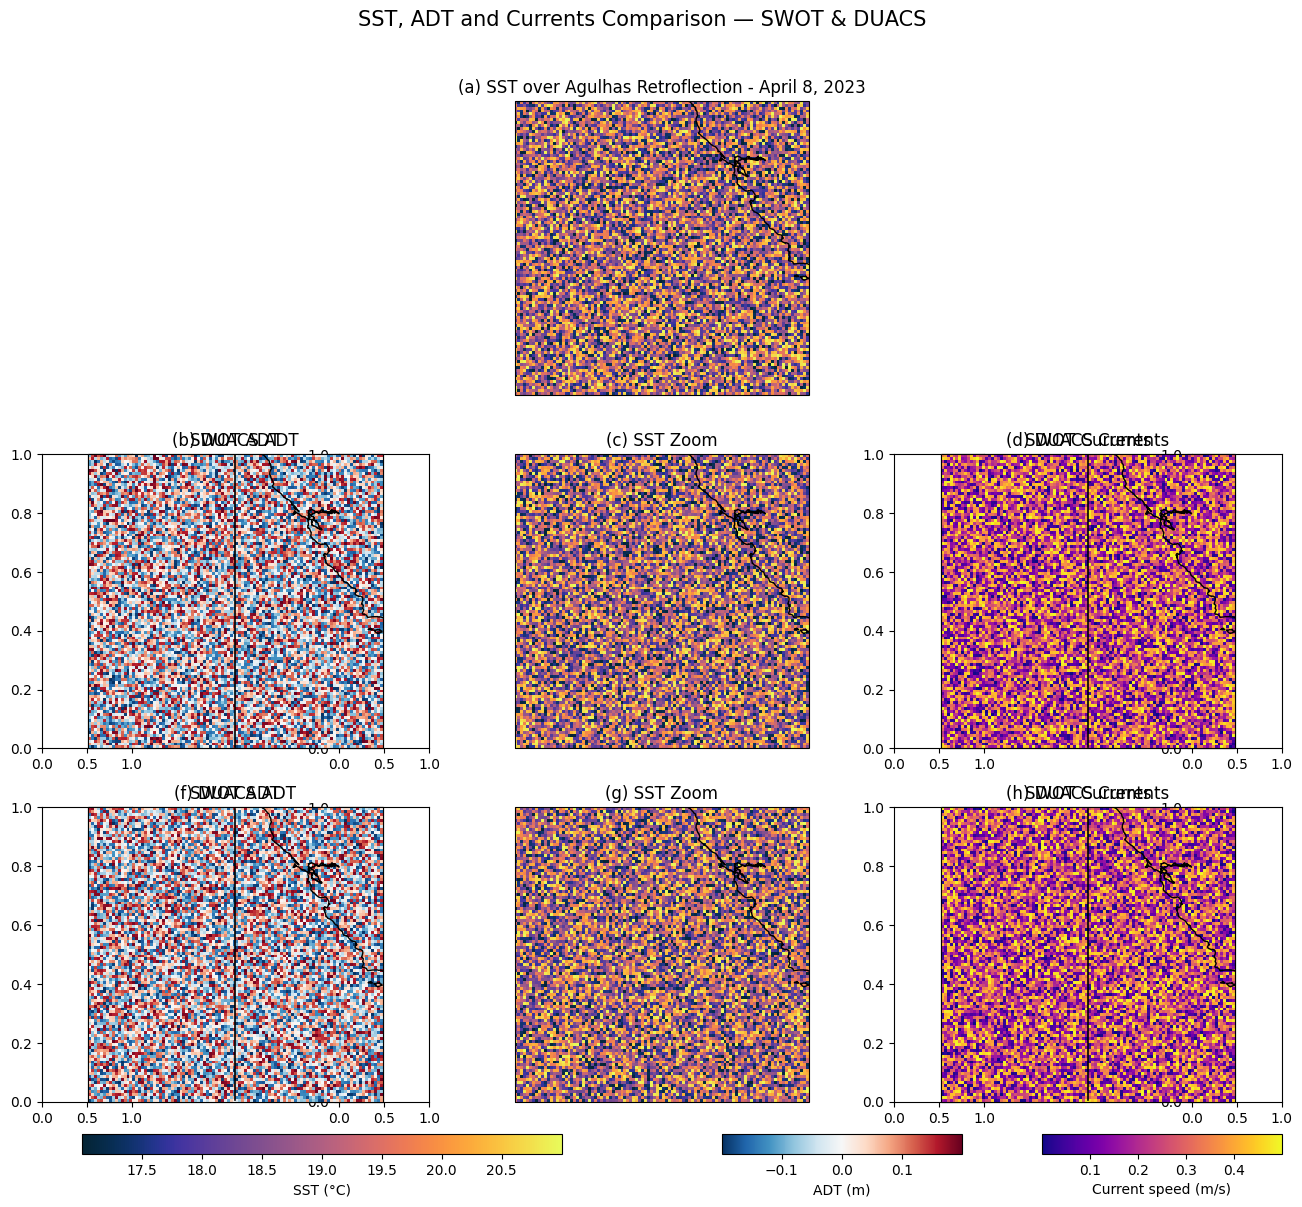

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

# === Dummy data (replace with your real data) ===
lon = np.linspace(-130, -120, 100)
lat = np.linspace(30, 40, 100)
lon, lat = np.meshgrid(lon, lat)

# SST
sst = np.random.uniform(17, 21, size=(100, 100))
sst_zoom_1 = np.random.uniform(17, 21, size=(100, 100))
sst_zoom_2 = np.random.uniform(17, 21, size=(100, 100))

# ADT DUACS & SWOT
adt_duacs_1 = np.random.uniform(-0.2, 0.2, size=(100, 100))
adt_swot_1 = np.random.uniform(-0.2, 0.2, size=(100, 100))
adt_duacs_2 = np.random.uniform(-0.2, 0.2, size=(100, 100))
adt_swot_2 = np.random.uniform(-0.2, 0.2, size=(100, 100))

# Currents DUACS & SWOT
curr_duacs_1 = np.random.uniform(0, 0.5, size=(100, 100))
curr_swot_1 = np.random.uniform(0, 0.5, size=(100, 100))
curr_duacs_2 = np.random.uniform(0, 0.5, size=(100, 100))
curr_swot_2 = np.random.uniform(0, 0.5, size=(100, 100))

proj = ccrs.PlateCarree()

# === Create figure and gridspec ===
fig = plt.figure(figsize=(16, 13))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1], hspace=0.2, wspace=0.1)

# ===== Panel (a) SST full map =====
ax1 = fig.add_subplot(gs[0, :], projection=proj)
im1 = ax1.pcolormesh(lon, lat, sst, cmap=cmocean.cm.thermal, transform=proj)
ax1.set_title('(a) SST over Agulhas Retroflection - April 8, 2023')
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)

# ===== Row 2 =====
# (b) ADT DUACS left, SWOT right
ax2 = fig.add_subplot(gs[1, 0])
divider = make_axes_locatable(ax2)
ax2_duacs_pos = divider.append_axes("left", size="48%", pad=0.1, sharey=ax2)
ax2_swot_pos = divider.append_axes("right", size="48%", pad=0.1, sharey=ax2)

ax2_duacs = fig.add_axes(ax2_duacs_pos.get_position(), projection=proj)
ax2_swot = fig.add_axes(ax2_swot_pos.get_position(), projection=proj)

im2 = ax2_duacs.pcolormesh(lon, lat, adt_duacs_1, cmap='RdBu_r', transform=proj)
im3 = ax2_swot.pcolormesh(lon, lat, adt_swot_1, cmap='RdBu_r', transform=proj)
ax2_duacs.set_title('(b) DUACS ADT')
ax2_swot.set_title('SWOT ADT')
ax2_duacs.coastlines()
ax2_swot.coastlines()
# Optional separator line
for axx in [ax2_duacs, ax2_swot]:
    mid_lon = (lon.min() + lon.max()) / 2
    axx.plot([mid_lon, mid_lon], [lat.min(), lat.max()], color='k', linewidth=1.2, transform=proj)

fig.delaxes(ax2)

# (c) SST zoom
ax3 = fig.add_subplot(gs[1, 1], projection=proj)
im4 = ax3.pcolormesh(lon, lat, sst_zoom_1, cmap=cmocean.cm.thermal, transform=proj)
ax3.set_title('(c) SST Zoom')
ax3.coastlines()

# (d) Currents DUACS left, SWOT right
ax4 = fig.add_subplot(gs[1, 2])
divider4 = make_axes_locatable(ax4)
ax4_duacs_pos = divider4.append_axes("left", size="48%", pad=0.1, sharey=ax4)
ax4_swot_pos = divider4.append_axes("right", size="48%", pad=0.1, sharey=ax4)

ax4_duacs = fig.add_axes(ax4_duacs_pos.get_position(), projection=proj)
ax4_swot = fig.add_axes(ax4_swot_pos.get_position(), projection=proj)

im5 = ax4_duacs.pcolormesh(lon, lat, curr_duacs_1, cmap='plasma', transform=proj)
im6 = ax4_swot.pcolormesh(lon, lat, curr_swot_1, cmap='plasma', transform=proj)
ax4_duacs.set_title('(d) DUACS Currents')
ax4_swot.set_title('SWOT Currents')
ax4_duacs.coastlines()
ax4_swot.coastlines()
for axx in [ax4_duacs, ax4_swot]:
    axx.plot([mid_lon, mid_lon], [lat.min(), lat.max()], color='k', linewidth=1.2, transform=proj)

fig.delaxes(ax4)

# ===== Row 3 =====
# (f) ADT DUACS left, SWOT right
ax5 = fig.add_subplot(gs[2, 0])
divider5 = make_axes_locatable(ax5)
ax5_duacs_pos = divider5.append_axes("left", size="48%", pad=0.1, sharey=ax5)
ax5_swot_pos = divider5.append_axes("right", size="48%", pad=0.1, sharey=ax5)

ax5_duacs = fig.add_axes(ax5_duacs_pos.get_position(), projection=proj)
ax5_swot = fig.add_axes(ax5_swot_pos.get_position(), projection=proj)

im7 = ax5_duacs.pcolormesh(lon, lat, adt_duacs_2, cmap='RdBu_r', transform=proj)
im8 = ax5_swot.pcolormesh(lon, lat, adt_swot_2, cmap='RdBu_r', transform=proj)
ax5_duacs.set_title('(f) DUACS ADT')
ax5_swot.set_title('SWOT ADT')
ax5_duacs.coastlines()
ax5_swot.coastlines()
for axx in [ax5_duacs, ax5_swot]:
    axx.plot([mid_lon, mid_lon], [lat.min(), lat.max()], color='k', linewidth=1.2, transform=proj)

fig.delaxes(ax5)

# (g) SST zoom
ax6 = fig.add_subplot(gs[2, 1], projection=proj)
im9 = ax6.pcolormesh(lon, lat, sst_zoom_2, cmap=cmocean.cm.thermal, transform=proj)
ax6.set_title('(g) SST Zoom')
ax6.coastlines()

# (h) Currents DUACS left, SWOT right
ax7 = fig.add_subplot(gs[2, 2])
divider7 = make_axes_locatable(ax7)
ax7_duacs_pos = divider7.append_axes("left", size="48%", pad=0.1, sharey=ax7)
ax7_swot_pos = divider7.append_axes("right", size="48%", pad=0.1, sharey=ax7)

ax7_duacs = fig.add_axes(ax7_duacs_pos.get_position(), projection=proj)
ax7_swot = fig.add_axes(ax7_swot_pos.get_position(), projection=proj)

im10 = ax7_duacs.pcolormesh(lon, lat, curr_duacs_2, cmap='plasma', transform=proj)
im11 = ax7_swot.pcolormesh(lon, lat, curr_swot_2, cmap='plasma', transform=proj)
ax7_duacs.set_title('(h) DUACS Currents')
ax7_swot.set_title('SWOT Currents')
ax7_duacs.coastlines()
ax7_swot.coastlines()
for axx in [ax7_duacs, ax7_swot]:
    axx.plot([mid_lon, mid_lon], [lat.min(), lat.max()], color='k', linewidth=1.2, transform=proj)

fig.delaxes(ax7)

# ===== Colorbars =====
cbar_ax1 = fig.add_axes([0.15, 0.07, 0.3, 0.015])
fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal', label='SST (°C)')

cbar_ax2 = fig.add_axes([0.55, 0.07, 0.15, 0.015])
fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal', label='ADT (m)')

cbar_ax3 = fig.add_axes([0.75, 0.07, 0.15, 0.015])
fig.colorbar(im5, cax=cbar_ax3, orientation='horizontal', label='Current speed (m/s)')

plt.suptitle('SST, ADT and Currents Comparison — SWOT & DUACS', fontsize=15, y=0.95)
plt.show()
